In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("data/VOC_tracking.csv")

df['date'] = pd.to_datetime(df['week'], dayfirst=True)

df = df.drop(['week'], axis = 1)


#function to make province-wise dataset
def make_dataset():
    
    by_prov = pd.DataFrame()

    # Iterate through all the provinces
    for i in list(set(df.prov)):

        # Subset to the province
        sub = df[df['prov'] == i]

        # Add to the overall dataframe
        by_prov = by_prov.append(sub)
    
    return by_prov

#must pivot datasets for linear plot data so prov names are columns
def format_dataset(df):
    df_pivot = pd.pivot_table(df,
    columns = 'prov',
    index = 'date',
    values = 'total')
    
    df_pivot = df_pivot.rename_axis(None)

    return df_pivot

df_format_pivot = format_dataset(make_dataset())
df_format_pivot
df


,prov,total,date
0,Alberta,902,2021-03-14
1,British Columbia,667,2021-03-14
2,Manitoba,12,2021-03-14
3,New Brunswick,6,2021-03-14
4,Newfoundland and Labrador,88,2021-03-14
...,...,...,...
149,Prince Edward Island,19,2021-05-24
150,Quebec,5749,2021-05-24
151,Saskatchewan,5273,2021-05-24
152,Yukon,2,2021-05-24


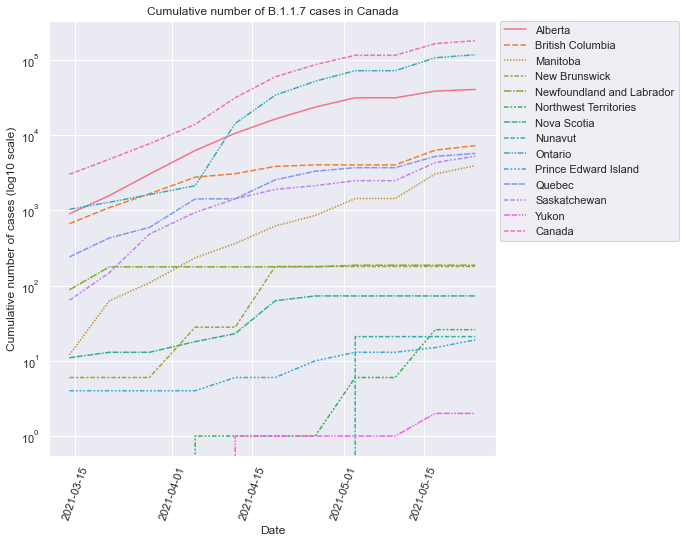

In [4]:
dims = (8, 8)
sns.set_theme(style = "darkgrid")
fig, ax = plt.subplots(figsize= dims)
sns.lineplot(x = "date", y = "total", hue = "prov", style = "prov", data=df)
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Cumulative number of B.1.1.7 cases in Canada")
plt.ylabel("Cumulative number of cases (log10 scale)")
plt.xlabel("Date")
plt.xticks(rotation=70)

#plt.show(f
plt.savefig('data/B.1.1.7_cases_Canada_log_May.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

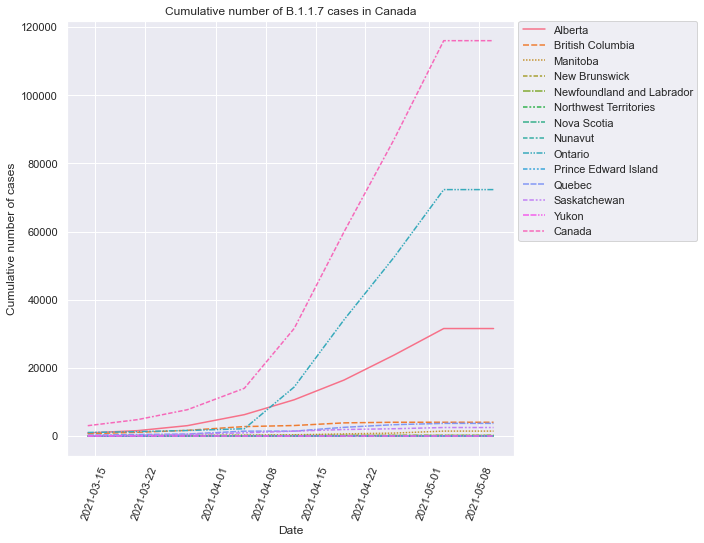

In [4]:
plt.clf()
sns.set_theme(style = "darkgrid")
fig, ax = plt.subplots(figsize= dims)
sns.lineplot(x = "date", y = "total", hue = "prov", style = "prov", data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Cumulative number of B.1.1.7 cases in Canada")
plt.ylabel("Cumulative number of cases")
plt.xlabel("Date")
plt.xticks(rotation=70)

plt.show(fig)

<Figure size 432x288 with 0 Axes>

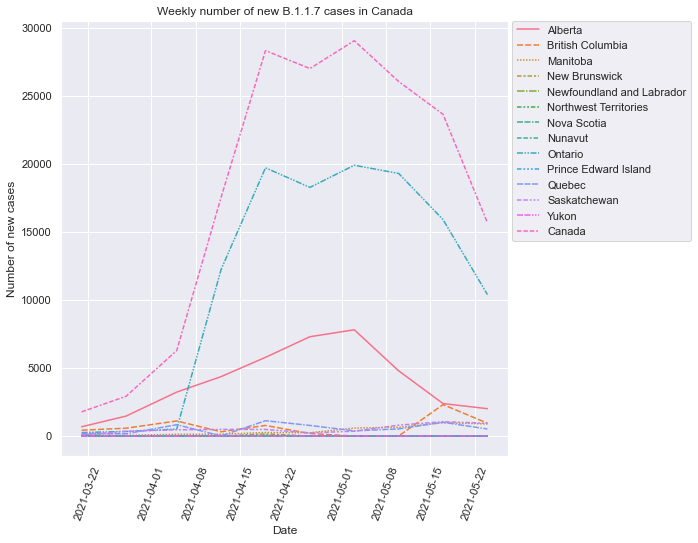

In [5]:
plt.clf()
new_cases = pd.read_csv("data/new_B117.csv")
new_cases['date'] = pd.to_datetime(new_cases['week'], dayfirst=True)

new_cases = new_cases.drop(['week'], axis = 1)

dims = (8, 8)
sns.set_theme(style = "darkgrid")
fig, ax = plt.subplots(figsize= dims)
sns.lineplot(x = "date", y = "total", hue = "prov", style = "prov", data=new_cases)
#plt.yscale("log")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Weekly number of new B.1.1.7 cases in Canada")
plt.ylabel("Number of new cases")
plt.xlabel("Date")
plt.xticks(rotation=70)

#plt.show(fig)
plt.savefig('data/Weekly_new_B.1.1.7_cases_Canada_May.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

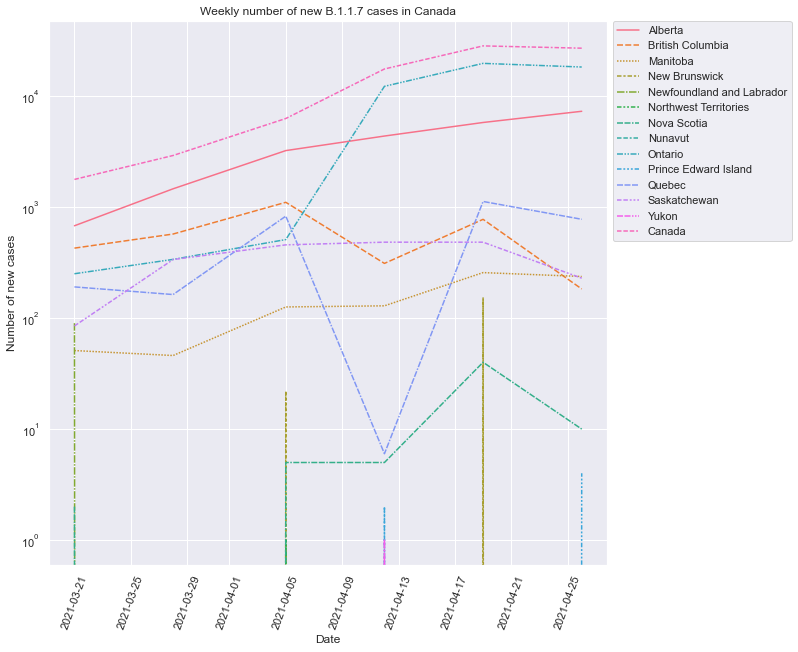

In [25]:
plt.clf()
dims = (10, 10)
sns.set_theme(style = "darkgrid")
fig, ax = plt.subplots(figsize= dims)
sns.lineplot(x = "date", y = "total", hue = "prov", style = "prov", data=new_cases)
#plt.yscale("log")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Weekly number of new B.1.1.7 cases in Canada")
plt.ylabel("Number of new cases")
plt.xlabel("Date")
plt.xticks(rotation=70)

plt.show(fig)
#plt.savefig('data/B.1.1.7_cases_Canada_log_25Apr.png', bbox_inches='tight')

In [76]:
df = df[~df['prov'].isin(['Nunavut', 'Northwest Territories', 'Yukon'])]
df.rename({'total': 'B.1.1.7 cases'}, axis=1, inplace = True)
cases.rename({'total': 'cases'}, axis=1, inplace = True)
df

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,prov,B.1.1.7 cases,date
0,Alberta,902,2021-03-14
1,British Columbia,667,2021-03-14
2,Manitoba,12,2021-03-14
3,New Brunswick,6,2021-03-14
4,Newfoundland and Labrador,88,2021-03-14
6,Nova Scotia,11,2021-03-14
8,Ontario,1036,2021-03-14
9,Prince Edward Island,4,2021-03-14
10,Quebec,241,2021-03-14
11,Saskatchewan,64,2021-03-14


In [101]:
merged = df.merge(cases, on=['prov', 'date'])
merged = merged[['date', 'prov', 'cases', 'B.1.1.7 cases']]
merged['cases'] = merged['cases'] - merged['B.1.1.7 cases']
mergedCanada = merged[merged['prov'] == 'Canada']
mergedCanada = mergedCanada.drop(['prov'], axis = 1)
B117 = mergedCanada
canadacases = mergedCanada
B117 = B117.drop(['cases'], axis = 1)
B117['type'] = 'B.1.1.7'
B117.rename({'B.1.1.7 cases': 'cases'}, axis=1, inplace = True)
canadacases = canadacases.drop(['B.1.1.7 cases'], axis = 1)
canadacases['type'] = 'total'
canadaplot = pd.concat([canadacases, B117], ignore_index = True)

canadaplot


,date,cases,type
0,2021-03-21,19919,total
1,2021-03-28,24481,total
2,2021-04-05,33216,total
3,2021-04-12,14217,total
4,2021-03-21,4807,B.1.1.7
5,2021-03-28,7725,B.1.1.7
6,2021-04-05,14010,B.1.1.7
7,2021-04-12,31567,B.1.1.7


<Figure size 432x288 with 0 Axes>

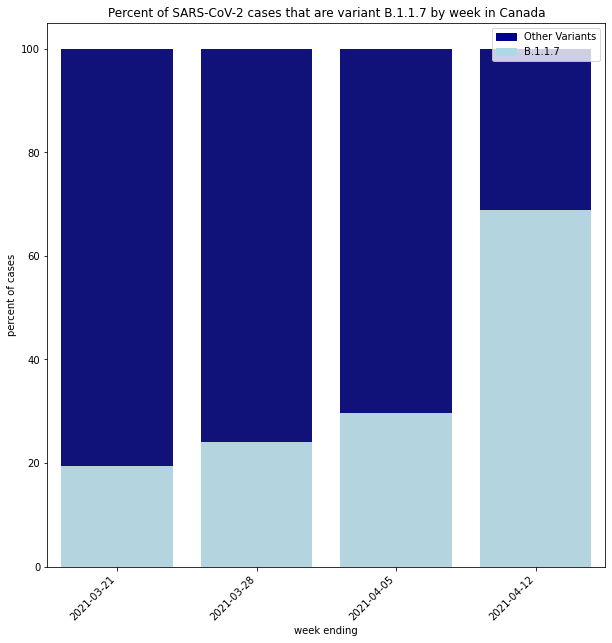

In [123]:
plt.clf()
fig, ax = plt.subplots(figsize=(10, 10))

import matplotlib.patches as mpatches
import matplotlib.dates as mdates

# from raw value to percentage
total = canadaplot.groupby('date')['cases'].sum().reset_index()
B = canadaplot[canadaplot.type=='B.1.1.7'].groupby('date')['cases'].sum().reset_index()
B['cases'] = [i / j * 100 for i,j in zip(B['cases'], total['cases'])]
total['cases'] = [i / j * 100 for i,j in zip(total['cases'], total['cases'])]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="date",  y="cases", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="date", y="cases", data=B, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Other Variants')
bottom_bar = mpatches.Patch(color='lightblue', label='B.1.1.7')

x_dates = canadaplot['date'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel('week ending')
plt.ylabel('percent of cases')
plt.title('Percent of SARS-CoV-2 cases that are variant B.1.1.7 by week in Canada')


# show the graph
#plt.show()
plt.savefig('data/B.1.1.7_case_proportion_Canada.png')